# Cleaning for scoring
- Which questions should be scored at all? 
- Scoring 'strongly disagree' - 'strongly agree' MCQs 
- Scoring non agree-scale MCQs and 'select all that apply' questions 
- Section scores 
- Overall scores 

In [ ]:
%cd ..
from src.data_synthesis import generate_synthetic_data

/Users/georgiathomas/Desktop/CH


/Users/georgiathomas/Desktop/CH/venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = generate_synthetic_data(n=205, seed=42)
df.head()

,Agency Name,First Name,Last Name,Email,"Role at your agency (for example, Executive Director or Program Manager)",We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,"In terms of personnel, what do you need most to support your program? Select all that apply:",Please share any other comments you have regarding your operations:,...,We have a developed budget that accurately reflects expenses and income.,Is City Harvest's grant portal helpful in identifying and applying for funding opportunities?,Please share any other comments you have regarding funding and financial stability:,CH partners have reported that wait times for clients are increasing across the city for many reasons. Has your program tried any strategies to reduce wait time for your clients? What has worked best for your program?,How has communication with your clients been in the last year? Please select all that apply:,Have you tried any of the following strategies to better communicate with your clients? Please select all that apply:,Which of the following languages do you encounter regularly? Select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?,What additional changes or challenges has your food program experienced in the last year?,"Please share any other comments you have regarding your community, program and/or clients:"
0,Agency 1,First Name,Last Name,Email,Role,Agree,Disagree,[We may need to move soon.],"[More volunteers, Increased donors and fundrai...",comment,...,Disagree,"Not sure, I don't know what that is.",comment,N/A,"[We have had some language barriers., We have ...",[Used a technology to help translate in the mo...,"[Arabic, Russian]",Sometimes,comment,N/A
1,Agency 2,First Name,Last Name,Email,Role,Strongly Agree,Agree,"[We may need to move soon., We could use help ...","[Paid staff (we currently don't have any), Inc...",comment,...,N/A,Yes,N/A,comment,[We have had no issues.],[Started learning a new language to better acc...,"[French Creole, Chinese (including Cantonese a...",Rarely,comment,N/A
2,Agency 3,First Name,Last Name,Email,Role,Neutral,Agree,[Our space works well for our distributions.],"[Increased donors and fundraising, Increased b...",comment,...,N/A,"Not sure, I don't know what that is.",comment,N/A,[We have had to try new things to overcome com...,[Started learning a new language to better acc...,"[Chinese (including Cantonese and Mandarin), F...",Rarely,N/A,N/A
3,Agency 4,First Name,Last Name,Email,Role,Strongly Agree,N/A,[We could use help reorganizing or reimagining...,"[More paid staff, Increased board engagement, ...",N/A,...,Disagree,No,N/A,comment,[We have had to try new things to overcome com...,[Used a technology to help translate in the mo...,"[English, Russian, Spanish, Arabic, Chinese (i...",Usually,comment,N/A
4,Agency 5,First Name,Last Name,Email,Role,Strongly Agree,Disagree,[We could use help reorganizing or reimagining...,"[More paid staff, Increased donors and fundrai...",N/A,...,Neutral,No,comment,N/A,[We have had no issues.],[Used a technology to help translate in the mo...,"[French Creole, Bengali, Russian, English, Ara...",Rarely,N/A,comment


# Step 1. Which questions should be included? 
Columns to be dropped: 
- unnecessary info like names and emails
- open ended responses (they will be coded later, but will not contribute to the agency's section or overall scores)
- questions that do not reflect an agency's capacity (to be analyzed later, but will not contribute to the agency's section or overall scores)

In [ ]:
unnecessary_info = ['First Name', 'Last Name', 'Email', 'Role at your agency (for example, Executive Director or Program Manager)']
open_ended = ['Please share any other comments you have regarding your operations:', 
              'Please share any other comments you have regarding leadership and management:',
              'Please share any other comments you have regarding data and evaluation:',
              'If so, which coalitions are you a part of?',
              'Please share any other comments you have regarding advocacy:',
              'Please share any other comments you have regarding City Harvest:',
              'Please share any other comments you have regarding funding and financial stability:',
              'CH partners have reported that wait times for clients are increasing across the city for many reasons. Has your program tried any strategies to reduce wait time for your clients? What has worked best for your program?',
              'What additional changes or challenges has your food program experienced in the last year?',
              'Please share any other comments you have regarding your community, program and/or clients:',
                   ]

### Irrelevant to capacity 
Some of the questions on the 2024 survey ask about the capacity of City Harvest, not the agencies. These questions should not be included in the assesment of the agencies. Here are the questions to be excluded, and why: 

- 'City Harvest delivers food that meets the cultural, religious and dietary needs of our clients.' : reflects CH
- 'On average, how would you rate the food you receive from City Harvest?' : reflects CH
- 'Does CH deliver the right amount of food to your program?' : reflects CH
- 'How would you prefer to receive your deliveries from CH?' : irrelevant to agency capacity 
- 'How often do CH deliveries arrive in your planned time window' : reflects CH
- 'If you currently are using Harvest Hub, what do you use it for? Select all that apply:' : Harvest Hub is a website for coordinating with City Harvest. It could be argued that use of Harvest Hub is an indicator of technology competence, and thus agency capacity. However, I don't think it's fair to include until Harvest Hub actually mandated, as agencies might currently have alternate ways of contacting CH and organizing deliveries. 
- 'How frequently does your agency use the City Harvest 'Harvest Hub Portal?' : This question could similarly be used as an indictor of technology use, but I chose not to include it because Harvest Hub is not currently mandated. For example, many agencies coordinate deliveries by calling the CH coordinator directly. Perhaps the agency is unable to use Harvest Hub, or perhaps they find the site slow and calling more efficient -- this distinction is not clear from this question. 
- 'Is City Harvest's grant portal helpful in identifying and applying for funding opportunities?' : reflects CH
- 'Which of the following languages do you encounter regularly? Select all that apply:' : irrelevant to agency capacity 

Again-- these questions still capture important information and will be analyzed later! We are working towards section and overall scores, so they are being excluded right now because they do not reflect agency capacity. 

In [ ]:
irrelevant = ['City Harvest delivers food that meets the cultural, religious and dietary needs of our clients.',
              'On average, how would you rate the food you receive from City Harvest?',
              'Does CH deliver the right amount of food to your program?',
              'How would you prefer to receive your deliveries from CH?',
              'How often do CH deliveries arrive in your planned time window',
              'If you currently are using Harvest Hub, what do you use it for? Select all that apply:',
              "How frequently does your agency use the City Harvest 'Harvest Hub Portal?",
              "Is City Harvest's grant portal helpful in identifying and applying for funding opportunities?",
              'Which of the following languages do you encounter regularly? Select all that apply:'
             ]

In [ ]:
df = df.drop(columns= unnecessary_info + open_ended + irrelevant)

In [ ]:
df.head()

,Agency Name,We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,"In terms of personnel, what do you need most to support your program? Select all that apply:",I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.,We have a solid group of volunteers we can rely on.,Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.,Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.,How do you currently track your program data? Select all that apply:,Could you use support or training around tracking your data and evaluating your programming?,Our agency is familiar with the City Harvest Policy Platform.,"Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.","As an agency, we know how to get in touch with local, state, and federal elected officials.","Do you participate in advocacy coalitions at the city, state, or national level?",We receive monetary funding and donations from different sources.,We have a developed budget that accurately reflects expenses and income.,How has communication with your clients been in the last year? Please select all that apply:,Have you tried any of the following strategies to better communicate with your clients? Please select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?
0,Agency 1,Agree,Disagree,[We may need to move soon.],"[More volunteers, Increased donors and fundrai...",Strongly Agree,Strongly Agree,Strongly disagree,Agree,"[FeedNYC, Excel, Plentiful]",Not sure,Neutral,Strongly Agree,Disagree,Yes,Agree,Disagree,"[We have had some language barriers., We have ...",[Used a technology to help translate in the mo...,Sometimes
1,Agency 2,Strongly Agree,Agree,"[We may need to move soon., We could use help ...","[Paid staff (we currently don't have any), Inc...",Agree,Strongly disagree,Strongly Agree,Neutral,"[Pen and paper, Plentiful]",No - we feel confident in our ability to track...,Strongly Agree,Agree,Agree,No,Strongly disagree,N/A,[We have had no issues.],[Started learning a new language to better acc...,Rarely
2,Agency 3,Neutral,Agree,[Our space works well for our distributions.],"[Increased donors and fundraising, Increased b...",Strongly disagree,N/A,Disagree,N/A,"[Pen and paper, Plentiful, Excel, FeedNYC]",Not sure,Strongly disagree,Neutral,N/A,Not sure,Strongly Agree,N/A,[We have had to try new things to overcome com...,[Started learning a new language to better acc...,Rarely
3,Agency 4,Strongly Agree,N/A,[We could use help reorganizing or reimagining...,"[More paid staff, Increased board engagement, ...",Strongly Agree,Strongly disagree,Agree,Disagree,[Excel],No - we feel confident in our ability to track...,Strongly Agree,Agree,Disagree,Yes,Strongly Agree,Disagree,[We have had to try new things to overcome com...,[Used a technology to help translate in the mo...,Usually
4,Agency 5,Strongly Agree,Disagree,[We could use help reorganizing or reimagining...,"[More paid staff, Increased donors and fundrai...",Strongly Agree,Disagree,N/A,N/A,[FeedNYC],Not sure,Disagree,Strongly disagree,Disagree,No,Disagree,Neutral,[We have had no issues.],[Used a technology to help translate in the mo...,Rarely


# Step 2. Scoring questions with answers on the 'agree' scale. 

In [ ]:
df.columns

Index(['Agency Name',
       'We have the right kind and amount of operational equipment to meet our program's needs.',
       'All our operational equipment is in good working order.',
       'Which of these statements best describes your current space? Select all that apply:',
       'In terms of personnel, what do you need most to support your program? Select all that apply:',
       'I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.',
       'We have a solid group of volunteers we can rely on.',
       'Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.',
       'Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.',
       'How do you currently track your program data? Select all that apply:',
       'Could you use support or training around tracking your data and evaluating your programming?',
       'Our agency

In [ ]:
agree_map = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5,
    "N/A": np.nan
}

agree_map_cols = [
       "We have the right kind and amount of operational equipment to meet our program's needs.",
       'All our operational equipment is in good working order.',
       'I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.',
       'We have a solid group of volunteers we can rely on.',
       'Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.',
       'Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.',
       'Our agency is familiar with the City Harvest Policy Platform.',
       'Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.',
       'As an agency, we know how to get in touch with local, state, and federal elected officials.',
       'We receive monetary funding and donations from different sources.',
       'We have a developed budget that accurately reflects expenses and income.',
]

In [ ]:
df[agree_map_cols] = df[agree_map_cols].replace(agree_map)
df.head()

/var/folders/1w/2ry5x9pj0sj3nynnwxyhdqlh0000gn/T/ipykernel_75953/1337349152.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[agree_map_cols] = df[agree_map_cols].replace(agree_map)


,Agency Name,We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,"In terms of personnel, what do you need most to support your program? Select all that apply:",I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.,We have a solid group of volunteers we can rely on.,Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.,Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.,How do you currently track your program data? Select all that apply:,Could you use support or training around tracking your data and evaluating your programming?,Our agency is familiar with the City Harvest Policy Platform.,"Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.","As an agency, we know how to get in touch with local, state, and federal elected officials.","Do you participate in advocacy coalitions at the city, state, or national level?",We receive monetary funding and donations from different sources.,We have a developed budget that accurately reflects expenses and income.,How has communication with your clients been in the last year? Please select all that apply:,Have you tried any of the following strategies to better communicate with your clients? Please select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?
0,Agency 1,4.0,2.0,[We may need to move soon.],"[More volunteers, Increased donors and fundrai...",5.0,5.0,1.0,4.0,"[FeedNYC, Excel, Plentiful]",Not sure,3.0,5.0,2.0,Yes,4.0,2.0,"[We have had some language barriers., We have ...",[Used a technology to help translate in the mo...,Sometimes
1,Agency 2,5.0,4.0,"[We may need to move soon., We could use help ...","[Paid staff (we currently don't have any), Inc...",4.0,1.0,5.0,3.0,"[Pen and paper, Plentiful]",No - we feel confident in our ability to track...,5.0,4.0,4.0,No,1.0,NaN,[We have had no issues.],[Started learning a new language to better acc...,Rarely
2,Agency 3,3.0,4.0,[Our space works well for our distributions.],"[Increased donors and fundraising, Increased b...",1.0,NaN,2.0,NaN,"[Pen and paper, Plentiful, Excel, FeedNYC]",Not sure,1.0,3.0,NaN,Not sure,5.0,NaN,[We have had to try new things to overcome com...,[Started learning a new language to better acc...,Rarely
3,Agency 4,5.0,NaN,[We could use help reorganizing or reimagining...,"[More paid staff, Increased board engagement, ...",5.0,1.0,4.0,2.0,[Excel],No - we feel confident in our ability to track...,5.0,4.0,2.0,Yes,5.0,2.0,[We have had to try new things to overcome com...,[Used a technology to help translate in the mo...,Usually
4,Agency 5,5.0,2.0,[We could use help reorganizing or reimagining...,"[More paid staff, Increased donors and fundrai...",5.0,2.0,NaN,NaN,[FeedNYC],Not sure,2.0,1.0,2.0,No,2.0,3.0,[We have had no issues.],[Used a technology to help translate in the mo...,Rarely


# Step 3. Scoring other questions
Next, we will create a scoring system for questions that reflect agency capacity, but do not follow the 'agree' scale. 
- Which of these statements best describes your current space? Select all that apply:
- In terms of personnel, what do you need most to support your program? Select all that apply:
- How do you currently track your program data? Select all that apply:
- Could you use support or training around tracking your data and evaluating your programming?
- Do you participate in advocacy coalitions at the city, state, or national level?
- How has communication with your clients been in the last year? Please select all that apply:
- Have you tried any of the following strategies to better communicate with your clients? Please select all that apply:
- How often do you ask your clients for feedback and make changes based on their responses?

## Which of these statements best describes your current space? Select all that apply:
This question is from the 'Operations' section.
Answer options: 
- "Our space works well for our distributions."
- "We could use help reorganizing or reimagining our distributions."
- "We will need to make infrastructure changes to operate."
- "We may need to move soon."

The 'select all that apply' format of this question is not completely clear. For example, it would be difficult to interpret a response such as, "Our space works well for our distributions" AND "We may need to move soon.".

If we were using the real set of responses, the first step would be to explore the data.

Which responses were most popular? 
Note that the bars can be interpreted as the percent of agencies that picked a given choice, but not the percent of agencies that picked ONLY a given choice. 

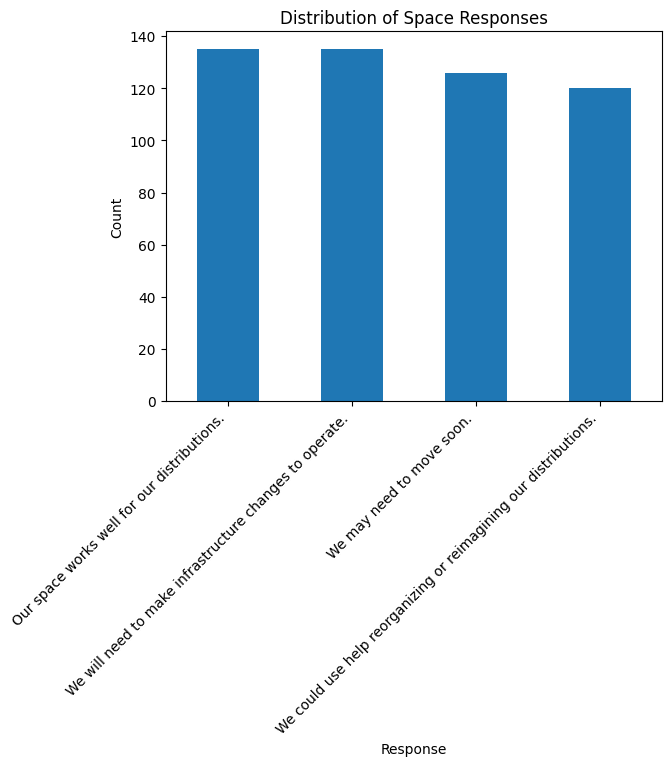

In [ ]:
counts = df["Which of these statements best describes your current space? Select all that apply:"].explode().value_counts()

counts.plot(kind="bar")
plt.title("Distribution of Space Responses")
plt.xlabel("Response")
plt.xticks(rotation=45, ha = "right")
plt.ylabel("Count")
plt.show()

Since the synthesized data was randomly generated, this ditribution is roughly uniform. However, this probably wouldn't be the case for the real data. 

How many agencies picked only 1 response? How many agencies picked all of them? The following graph shows the distribution of the number of responses selected by each agency. 

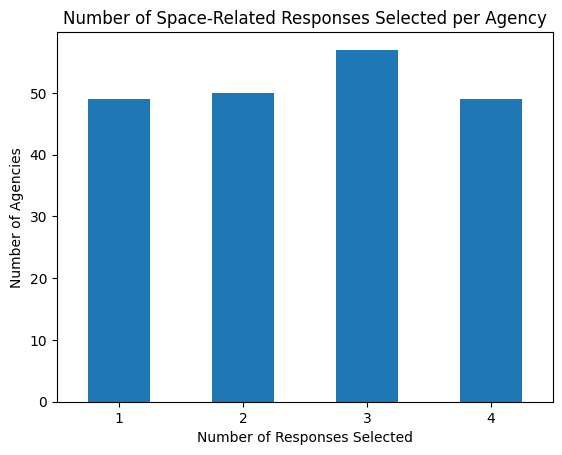

In [ ]:
number_selected = df["Which of these statements best describes your current space? Select all that apply:"].apply(len)
counts = number_selected.value_counts().sort_index()

counts.plot(kind="bar")
plt.title("Number of Space-Related Responses Selected per Agency")
plt.xlabel("Number of Responses Selected")
plt.ylabel("Number of Agencies")
plt.xticks(rotation=0)
plt.show()

Since the number of responses were also randomly generated,  this distribution is again roughly uniform and probably not representative of the real data. It seems unlikely that one quarter of agencies would select all four option choices, for example. 

The distribution of number of responses would help us score the responses for this question. If almost all agencies only selected one choice, then we could drop the responses with multiple choices or give them a set score, and treat this question like a MCQ. 

#### Objective approach: 
As mentioned earlier, the selection of multiple choices is not easily interpretable for this question. Thus, if a significant proportion of agencies picked multiple choices, we could filter by the 'lowest' choice. The rationale is that this survey is meant to identify weaknesses in network capacity and its results will inform future initiatives to assist agencies. I ranked the choices in the order they appear on the survey, which follows the structure of other questions. From best to worst:  
1. "Our space works well for our distributions."
2. "We could use help reorganizing or reimagining our distributions."
3. "We will need to make infrastructure changes to operate."
4. "We may need to move soon."

Next, we need to make the scores from this questions compatable with the agree-scale questions. Since there are four questions instead of five, it is not possible to do a one-to-one matching. Instead, I identified two options: 
1. Responses could be scored 1-4, and then standardized to fit the range of 1-5.
2. Responses could be matched to numbers manually. This approach is less objective, but preserves integer values for the section and overall scores. 

#### Contexual approach
Intuitively, there seems to be only one truly positive choice: "Our space works well for our distributions.". The other choices all indicate some level of need / lack of operational capacity. Additionally, it's worth noting that the last choice is not clearly positive or negative-- an agency could be planning to expand into a bigger space, or forced to downsize due to lack of funding, and there is no way to tell the difference from this question alone. Using this context, I would choose to ignore the choice "We may need to move soon.". Responses with multiple responses would be counted as the lower of the remaining responses, and responses of only "We may need to move soon." would be counted as blank, so they would not affect the section or overall scores. 

Thus the responses would be scored using the minumum as follows: 
- "Our space works well for our distributions." : Strongly agree : 5
- "We could use help reorganizing or reimagining our distributions." : Disagree : 2
- "We will need to make infrastructure changes to operate." : Strongly disagree : 1
- "We may need to move soon." : N/A

I'm choosing to filter by lowest, however, there are several other ways to combine the multiple choices. Given the above scoring, we could take the average. Ex: a response of "We could use help reorganizing or reimagining our distributions." AND "We will need to make infrastructure changes to operate." would be scored 1.5. I chose to filter by the minimum in order to keep all of the values integers. 

In [ ]:
space_map = {"Our space works well for our distributions." : 5,
"We could use help reorganizing or reimagining our distributions." : 2,
"We will need to make infrastructure changes to operate." : 1,
"We may need to move soon." : np.nan}

scores = df["Which of these statements best describes your current space? Select all that apply:"].apply(lambda responses: [space_map[r] for r in responses])
df["Which of these statements best describes your current space? Select all that apply:"] = scores.apply(np.nanmin)
df.head()

/Users/georgiathomas/Desktop/CH/venv/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: RuntimeWarning: All-NaN axis encountered
  return lib.map_infer(values, mapper, convert=convert)


,Agency Name,We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,"In terms of personnel, what do you need most to support your program? Select all that apply:",I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.,We have a solid group of volunteers we can rely on.,Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.,Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.,How do you currently track your program data? Select all that apply:,Could you use support or training around tracking your data and evaluating your programming?,Our agency is familiar with the City Harvest Policy Platform.,"Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.","As an agency, we know how to get in touch with local, state, and federal elected officials.","Do you participate in advocacy coalitions at the city, state, or national level?",We receive monetary funding and donations from different sources.,We have a developed budget that accurately reflects expenses and income.,How has communication with your clients been in the last year? Please select all that apply:,Have you tried any of the following strategies to better communicate with your clients? Please select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?
0,Agency 1,4.0,2.0,NaN,"[More volunteers, Increased donors and fundrai...",5.0,5.0,1.0,4.0,"[FeedNYC, Excel, Plentiful]",Not sure,3.0,5.0,2.0,Yes,4.0,2.0,"[We have had some language barriers., We have ...",[Used a technology to help translate in the mo...,Sometimes
1,Agency 2,5.0,4.0,2.0,"[Paid staff (we currently don't have any), Inc...",4.0,1.0,5.0,3.0,"[Pen and paper, Plentiful]",No - we feel confident in our ability to track...,5.0,4.0,4.0,No,1.0,NaN,[We have had no issues.],[Started learning a new language to better acc...,Rarely
2,Agency 3,3.0,4.0,5.0,"[Increased donors and fundraising, Increased b...",1.0,NaN,2.0,NaN,"[Pen and paper, Plentiful, Excel, FeedNYC]",Not sure,1.0,3.0,NaN,Not sure,5.0,NaN,[We have had to try new things to overcome com...,[Started learning a new language to better acc...,Rarely
3,Agency 4,5.0,NaN,1.0,"[More paid staff, Increased board engagement, ...",5.0,1.0,4.0,2.0,[Excel],No - we feel confident in our ability to track...,5.0,4.0,2.0,Yes,5.0,2.0,[We have had to try new things to overcome com...,[Used a technology to help translate in the mo...,Usually
4,Agency 5,5.0,2.0,1.0,"[More paid staff, Increased donors and fundrai...",5.0,2.0,NaN,NaN,[FeedNYC],Not sure,2.0,1.0,2.0,No,2.0,3.0,[We have had no issues.],[Used a technology to help translate in the mo...,Rarely


## In terms of personnel, what do you need most to support your program? Select all that apply:
This question is in the 'Operations' section. Here are the options: 
- "Paid staff (we currently don't have any)"
- "More paid staff"
- "More volunteers"
- "Increased board engagement"
- "Increased community support & engagement"
- "Increased donors and fundraising"

It could be argued that this question should be excluded because it does not necesaarily represent an agency's lack of capacity. For example, almost any nonprofit will welcome additional donors and fundraising. 
Before deciding, we should explore the data. 

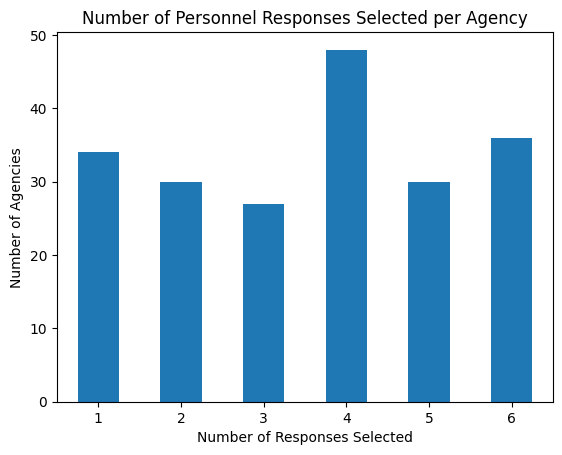

In [ ]:
number_selected = df["In terms of personnel, what do you need most to support your program? Select all that apply:"].apply(len)
counts = number_selected.value_counts().sort_index()

counts.plot(kind="bar")
plt.title("Number of Personnel Responses Selected per Agency")
plt.xlabel("Number of Responses Selected")
plt.ylabel("Number of Agencies")
plt.xticks(rotation=0)
plt.show()

If the number of responses selected was skewed right (so most agencies picked all/almost all options), that could indicate all agencies are in need of capacity in many areas. However, it would also make the data less helpful, since it is unclear which areas are most needed. 

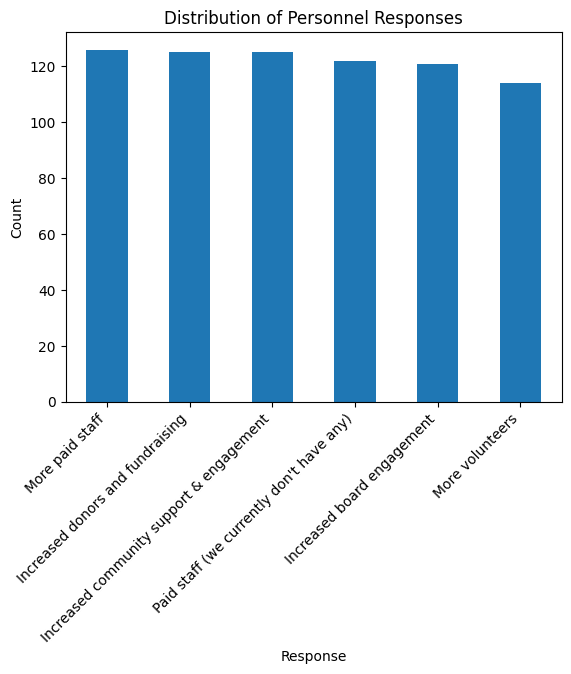

In [ ]:
counts = df["In terms of personnel, what do you need most to support your program? Select all that apply:"].explode().value_counts()

counts.plot(kind="bar")
plt.title("Distribution of Personnel Responses")
plt.xlabel("Response")
plt.xticks(rotation=45, ha = "right")
plt.ylabel("Count")
plt.show()

As before, the synthetic data was randomly generated, so both graphs have a relatively uniform distribution. 

I actually think this question should be (mostly) excluded from the scores. However, we will go through two options. 
#### Objective approach
We could count each indication of need as a lack of capacity, so the score would decrease as the number of choices selected increases. 
Ex: 
- 'Paid staff (we currently don't have any)' OR 'More paid staff' : 1
- "More volunteers" : 1 
- "Increased board engagement" : 1
- "Increased community support & engagement" : 1
- "Increased donors and fundraising" : 1
Then the score equals the sum of the list, and it has the same scale as the agree-scale questions. 

#### Contexual approach
Intuitively, not all of these selections represent an equal amount of 'need', and they are not all necessarily negative. 
In terms of magnitude, 'Paid staff (we currently don't have any)' is clearly a problem of bigger magnitude than 'More paid staff'. We could adjust the magnitude of the scoring to reflect this, but it is more difficult to assign magnitudes to other choices. For example, it seems like "Increased community support & engagement" might be a less pressing problem than "Increased donors and fundraising", but how can we quantify this difference, especially compared to the staffing based questions? 
In terms of direction, not all of these selections necessarily indicate a lack of capacity. For example, organizations with boards tend to be bigger, better established, and better funded. Thus selecting "Increased board engagement" could actually be an indication of a high-capacity agency, because the agencies with the most need would be extremely unlikely to select this choice. For another example, some agencies do not have a perception of donors and fundraising. Many small organizations operate completely off of food donations, so their business model does not include donors or fundraising. As before, selecting "Increased donors and fundraising" might not capture the need of the lowest capacity agencies. 

Thus, I'm choosing to use this question as an indicator to whether an agency has paid employees or not. The other selections can be analyzed later as feedback for City Harvest, rather than reflecting the capacity of an agency. 
Selecting "Paid staff (we currently don't have any)" will indicate a score of zero, while not selecting this option will indicate a score of 5. The scoring is extreme because it has been established that having at least one paid employee is important for the overall capacity of an organization. 

We will first establish a column for "Paid staff (we currently don't have any)" with binary outcomes 0/1, then map to the scores 1/5. 

In [ ]:
df["In terms of personnel, what do you need most to support your program? Select all that apply:"] = df["In terms of personnel, what do you need most to support your program? Select all that apply:"].apply(lambda responses: int("Paid staff (we currently don't have any)" in responses))
df = df.rename(columns={"In terms of personnel, what do you need most to support your program? Select all that apply:" : "Paid staff (we currently don't have any)"})

paid_map = {0: 5, 1: 1}
df["Paid staff (we currently don't have any)"] = df["Paid staff (we currently don't have any)"].map(paid_map)

df.head()                                                                                                                                                                                                                                                                                                                                       

,Agency Name,We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,Paid staff (we currently don't have any),I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.,We have a solid group of volunteers we can rely on.,Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.,Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.,How do you currently track your program data? Select all that apply:,Could you use support or training around tracking your data and evaluating your programming?,Our agency is familiar with the City Harvest Policy Platform.,"Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.","As an agency, we know how to get in touch with local, state, and federal elected officials.","Do you participate in advocacy coalitions at the city, state, or national level?",We receive monetary funding and donations from different sources.,We have a developed budget that accurately reflects expenses and income.,How has communication with your clients been in the last year? Please select all that apply:,Have you tried any of the following strategies to better communicate with your clients? Please select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?
0,Agency 1,4.0,2.0,NaN,5,5.0,5.0,1.0,4.0,"[FeedNYC, Excel, Plentiful]",Not sure,3.0,5.0,2.0,Yes,4.0,2.0,"[We have had some language barriers., We have ...",[Used a technology to help translate in the mo...,Sometimes
1,Agency 2,5.0,4.0,2.0,1,4.0,1.0,5.0,3.0,"[Pen and paper, Plentiful]",No - we feel confident in our ability to track...,5.0,4.0,4.0,No,1.0,NaN,[We have had no issues.],[Started learning a new language to better acc...,Rarely
2,Agency 3,3.0,4.0,5.0,5,1.0,NaN,2.0,NaN,"[Pen and paper, Plentiful, Excel, FeedNYC]",Not sure,1.0,3.0,NaN,Not sure,5.0,NaN,[We have had to try new things to overcome com...,[Started learning a new language to better acc...,Rarely
3,Agency 4,5.0,NaN,1.0,5,5.0,1.0,4.0,2.0,[Excel],No - we feel confident in our ability to track...,5.0,4.0,2.0,Yes,5.0,2.0,[We have had to try new things to overcome com...,[Used a technology to help translate in the mo...,Usually
4,Agency 5,5.0,2.0,1.0,1,5.0,2.0,NaN,NaN,[FeedNYC],Not sure,2.0,1.0,2.0,No,2.0,3.0,[We have had no issues.],[Used a technology to help translate in the mo...,Rarely


#### How do you currently track your program data? Select all that apply:¶
This question is in the Data & Evaluation section. Here are the answer choices:

- "Plentiful"
- "FeedNYC"
- "Excel"
- "Pen and paper"

Here are all of the possible responses: 

1. FeedNYC
2. Excel
3. Plentiful
4. Pen and paper
5. FeedNYC AND Excel
6. FeedNYC AND Plentiful
7. FeedNYC AND pen and paper
8. Excel AND Plentiful
9. Excel AND Pen and paper
10. Plentiful AND Pen and paper
11. FeedNYC AND Excel AND Plentiful
12. FeedNYC AND Excel AND pen and paper
13. FeedNYC AND Plentiful AND pen and paper
14. Excel AND Plentiful AND Pen and paper
15. FeedNYC AND Excel AND Plentiful AND Pen and paper

City Harvest values the use of technology in data tracking, so selecting 'FeedNYC', 'Excel', and/or 'Plentiful' would indicate a higher level of capacity than 'pen and paper' alone. One issue with this approach is that it is difficult to interpret (and score) responses with Excel AND/OR Plentiful but not FeedNYC. 

#### Objective approach: 
We could use this question as an indicator of technology use by assigning 1 to each response that includes an online tool (Plentiful, FeedNYC, Excel) and a 0 to any response that only chose 'pen and paper'. 
- response contains "Plentiful:" OR "FeedNYC" OR "Excel" : 1
- response contains 'Pen and paper' only: 0 
#### Contextual approach:
In order to be a partner with City Harvest, organizations must periodically submit data through FeedNYC. In theory, every agency should have selected 'FeedNYC'. Nnot selecting it could indicate lack of compliancy, or more likely, a lack of technological understanding by the agency leader. If we choose to use 'FeedNYC' as an indication of technology awareness, the question would be scores as follows: 
- response containing 'FeedNYC' : 5
- response not containing 'FeedNYC' : 1

We will choose an approach based on the percent of responses containing 'FeedNYC'. If almost all responses include FeedNYC, then we will score based on Excel/Plentiful selection. However, if there a significant proportion of responses missing 'FeedNYC' then we will score based on that, instead. 

In [ ]:
FeedNYC_no = (df["How do you currently track your program data? Select all that apply:"].apply(lambda responses: "FeedNYC" not in responses))
FeedNYC_no.mean() * 100

np.float64(38.53658536585366)

In [ ]:
tech_no = (df["How do you currently track your program data? Select all that apply:"].apply(lambda responses: responses == ["Pen and paper"]))
tech_no.mean() * 100

np.float64(8.292682926829269)

Here, 39% of responses did not include FeedNYC and 8% of responses did not include any technology based tools. Then around 30% of responses contain Excel AND/OR Plentiful but NOT FeedNYC, which is difficult to interpret. In this case, we would use this question as an indicator of FeedNYC awareness.

However, if the percent of responses missing FeedNYC had been very small (ex: 5%) then we would ignore these responses (assigned N/A) and score the other responses as described above. 

Given the synthesized data, we will use the approach based on FeedNYC. 

In [ ]:
df["How do you currently track your program data? Select all that apply:"] = df["How do you currently track your program data? Select all that apply:"].apply(lambda responses: int("FeedNYC" in responses))
df = df.rename(columns={"How do you currently track your program data? Select all that apply:" : "FeedNYC"})

feednyc_map = {0: 1, 1: 5}
df["FeedNYC"] = df["FeedNYC"].map(feednyc_map)

df.head()

,Agency Name,We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,Paid staff (we currently don't have any),I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.,We have a solid group of volunteers we can rely on.,Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.,Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.,FeedNYC,Could you use support or training around tracking your data and evaluating your programming?,Our agency is familiar with the City Harvest Policy Platform.,"Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.","As an agency, we know how to get in touch with local, state, and federal elected officials.","Do you participate in advocacy coalitions at the city, state, or national level?",We receive monetary funding and donations from different sources.,We have a developed budget that accurately reflects expenses and income.,How has communication with your clients been in the last year? Please select all that apply:,Have you tried any of the following strategies to better communicate with your clients? Please select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?
0,Agency 1,4.0,2.0,NaN,5,5.0,5.0,1.0,4.0,5,Not sure,3.0,5.0,2.0,Yes,4.0,2.0,"[We have had some language barriers., We have ...",[Used a technology to help translate in the mo...,Sometimes
1,Agency 2,5.0,4.0,2.0,1,4.0,1.0,5.0,3.0,1,No - we feel confident in our ability to track...,5.0,4.0,4.0,No,1.0,NaN,[We have had no issues.],[Started learning a new language to better acc...,Rarely
2,Agency 3,3.0,4.0,5.0,5,1.0,NaN,2.0,NaN,5,Not sure,1.0,3.0,NaN,Not sure,5.0,NaN,[We have had to try new things to overcome com...,[Started learning a new language to better acc...,Rarely
3,Agency 4,5.0,NaN,1.0,5,5.0,1.0,4.0,2.0,1,No - we feel confident in our ability to track...,5.0,4.0,2.0,Yes,5.0,2.0,[We have had to try new things to overcome com...,[Used a technology to help translate in the mo...,Usually
4,Agency 5,5.0,2.0,1.0,1,5.0,2.0,NaN,NaN,5,Not sure,2.0,1.0,2.0,No,2.0,3.0,[We have had no issues.],[Used a technology to help translate in the mo...,Rarely


#### "Could you use support or training around tracking your data and evaluating your programming?"
This question is in the Data & Evaluation section. Here are the choices: 
- "Yes - we would like support setting up ways to track data and measure impact."
- "No - we feel confident in our ability to track data and measure impact and could serve as an example for others"
- "Not sure."

These answer choices will be mapped to the agree-scale as follows: 
- "Yes - we would like support setting up ways to track data and measure impact." : Strongly disagree : 1
- "No - we feel confident in our ability to track data and measure impact and could serve as an example for others" : Strongly agree : 5
- "Not sure." : N/A : not counted

In [ ]:
agree_map_data = {
    "Yes - we would like support setting up ways to track data and measure impact.": 1,
    "Not sure" : np.nan,
    "No - we feel confident in our ability to track data and measure impact and could serve as an example for others": 5,
}

df["Could you use support or training around tracking your data and evaluating your programming?"] = df["Could you use support or training around tracking your data and evaluating your programming?"].map(agree_map_data)
df.head()

,Agency Name,We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,Paid staff (we currently don't have any),I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.,We have a solid group of volunteers we can rely on.,Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.,Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.,FeedNYC,Could you use support or training around tracking your data and evaluating your programming?,Our agency is familiar with the City Harvest Policy Platform.,"Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.","As an agency, we know how to get in touch with local, state, and federal elected officials.","Do you participate in advocacy coalitions at the city, state, or national level?",We receive monetary funding and donations from different sources.,We have a developed budget that accurately reflects expenses and income.,How has communication with your clients been in the last year? Please select all that apply:,Have you tried any of the following strategies to better communicate with your clients? Please select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?
0,Agency 1,4.0,2.0,NaN,5,5.0,5.0,1.0,4.0,5,NaN,3.0,5.0,2.0,Yes,4.0,2.0,"[We have had some language barriers., We have ...",[Used a technology to help translate in the mo...,Sometimes
1,Agency 2,5.0,4.0,2.0,1,4.0,1.0,5.0,3.0,1,5.0,5.0,4.0,4.0,No,1.0,NaN,[We have had no issues.],[Started learning a new language to better acc...,Rarely
2,Agency 3,3.0,4.0,5.0,5,1.0,NaN,2.0,NaN,5,NaN,1.0,3.0,NaN,Not sure,5.0,NaN,[We have had to try new things to overcome com...,[Started learning a new language to better acc...,Rarely
3,Agency 4,5.0,NaN,1.0,5,5.0,1.0,4.0,2.0,1,5.0,5.0,4.0,2.0,Yes,5.0,2.0,[We have had to try new things to overcome com...,[Used a technology to help translate in the mo...,Usually
4,Agency 5,5.0,2.0,1.0,1,5.0,2.0,NaN,NaN,5,NaN,2.0,1.0,2.0,No,2.0,3.0,[We have had no issues.],[Used a technology to help translate in the mo...,Rarely


#### "Do you participate in advocacy coalitions at the city, state, or national level?"
This question comes from the Advocacy section. Here are the answer choices: 
- Yes
- No
- Not sure

A food pantry's participation in an advocacy coalition might not affect their daily responsibilities, but it's important in order to support the communities they serve. 
- Yes : 5
- No : 1
- Not sure : 1
In this case, "Not sure" doesn't indicate any more awareness than "No", so they're scored the same. 

In [ ]:
agree_map_advocacy = {
    "Yes": 5,
    "Not sure" : 1,
    "No": 1,
}

df["Do you participate in advocacy coalitions at the city, state, or national level?"] = df["Do you participate in advocacy coalitions at the city, state, or national level?"].replace(agree_map_advocacy)
df.head()

/var/folders/1w/2ry5x9pj0sj3nynnwxyhdqlh0000gn/T/ipykernel_75953/2630593936.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Do you participate in advocacy coalitions at the city, state, or national level?"] = df["Do you participate in advocacy coalitions at the city, state, or national level?"].replace(agree_map_advocacy)


,Agency Name,We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,Paid staff (we currently don't have any),I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.,We have a solid group of volunteers we can rely on.,Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.,Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.,FeedNYC,Could you use support or training around tracking your data and evaluating your programming?,Our agency is familiar with the City Harvest Policy Platform.,"Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.","As an agency, we know how to get in touch with local, state, and federal elected officials.","Do you participate in advocacy coalitions at the city, state, or national level?",We receive monetary funding and donations from different sources.,We have a developed budget that accurately reflects expenses and income.,How has communication with your clients been in the last year? Please select all that apply:,Have you tried any of the following strategies to better communicate with your clients? Please select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?
0,Agency 1,4.0,2.0,NaN,5,5.0,5.0,1.0,4.0,5,NaN,3.0,5.0,2.0,5,4.0,2.0,"[We have had some language barriers., We have ...",[Used a technology to help translate in the mo...,Sometimes
1,Agency 2,5.0,4.0,2.0,1,4.0,1.0,5.0,3.0,1,5.0,5.0,4.0,4.0,1,1.0,NaN,[We have had no issues.],[Started learning a new language to better acc...,Rarely
2,Agency 3,3.0,4.0,5.0,5,1.0,NaN,2.0,NaN,5,NaN,1.0,3.0,NaN,1,5.0,NaN,[We have had to try new things to overcome com...,[Started learning a new language to better acc...,Rarely
3,Agency 4,5.0,NaN,1.0,5,5.0,1.0,4.0,2.0,1,5.0,5.0,4.0,2.0,5,5.0,2.0,[We have had to try new things to overcome com...,[Used a technology to help translate in the mo...,Usually
4,Agency 5,5.0,2.0,1.0,1,5.0,2.0,NaN,NaN,5,NaN,2.0,1.0,2.0,1,2.0,3.0,[We have had no issues.],[Used a technology to help translate in the mo...,Rarely


#### How has communication with your clients been in the last year? Please select all that apply:
This question is in the Community & Program Design section. Here are the answer choices: 
- We have had no issues.
- We have had some language barriers.
- We have had to try new things to overcome communication issues

For context, many food pantries struggle to find staff / volunteers that understand all of the different languages spoken by the people they serve. The 'select all that apple' format is not easily interpretable. For example, how would we characterize an agency that selected both 'We have had no issues' and 'We have had to try new things to overcome communication issues'? In order to understand the responses to this question, we will first look at the distribution of responses.  

In [ ]:
counts = (
    df["How has communication with your clients been in the last year? Please select all that apply:"]
    .apply(lambda x: tuple(sorted(x)))
    .value_counts()
)
counts

How has communication with your clients been in the last year? Please select all that apply:
(We have had no issues., We have had some language barriers., We have had to try new things to overcome communication issues)    65
(We have had some language barriers., We have had to try new things to overcome communication issues)                            32
(We have had no issues., We have had some language barriers.)                                                                    28
(We have had to try new things to overcome communication issues,)                                                                22
(We have had no issues., We have had to try new things to overcome communication issues)                                         20
(We have had no issues.,)                                                                                                        19
(We have had some language barriers.,)                                                                             

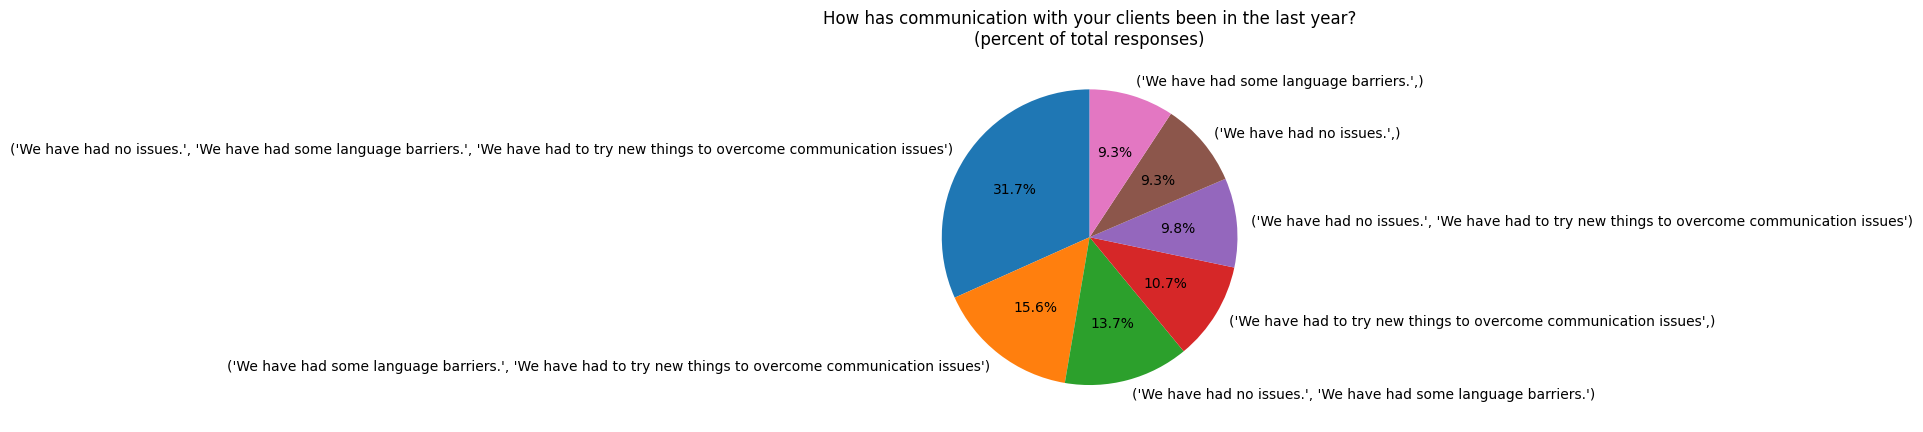

In [ ]:
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("How has communication with your clients been in the last year?\n(percent of total responses)")
plt.show()

The distribution of responses is due to the way I generated the data, and likely does not reflect the true data. It is not uniform because I first randomly selected the number of options to be selected, then randomly selected which responses would be included, given that size. 

In theory, there should be very few responses selecting all three. As mentioned earlier, this response is not easily interpretable. I will make this question an indicator for communication issues. Selecting "We have had no issues" indicates high capacity, while selecting "We have had some language barriers." AND/OR "We have had to try new things to overcome communication issues" indicates some degree of communication difficulty. The combination of "We have had no issues" and one/both of the other options could indicate a small issue, previous issue that has been resolved, or communication issues in some way. Since it is not clear, it will be mapped to "Neutral" on the agree-scale. 

- "We have had no issues" : 5
- Any combination including "We have had no issues" AND another choice : 3
- Any response without "We have had no issues" : 1

In [ ]:
agree_map_comm = {
    ("We have had no issues.",): 5,
    ("We have had some language barriers.",): 1,
    ("We have had to try new things to overcome communication issues",): 1,

    ("We have had no issues.", "We have had some language barriers."): 3,
    ("We have had no issues.", "We have had to try new things to overcome communication issues"): 3,
    ("We have had some language barriers.", "We have had to try new things to overcome communication issues"): 1,

    ("We have had no issues.", "We have had some language barriers.", "We have had to try new things to overcome communication issues"): 1
}
df["How has communication with your clients been in the last year? Please select all that apply:"] = df["How has communication with your clients been in the last year? Please select all that apply:"].apply(lambda x: agree_map_comm[tuple(sorted(x))])

df.head()

,Agency Name,We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,Paid staff (we currently don't have any),I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.,We have a solid group of volunteers we can rely on.,Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.,Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.,FeedNYC,Could you use support or training around tracking your data and evaluating your programming?,Our agency is familiar with the City Harvest Policy Platform.,"Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.","As an agency, we know how to get in touch with local, state, and federal elected officials.","Do you participate in advocacy coalitions at the city, state, or national level?",We receive monetary funding and donations from different sources.,We have a developed budget that accurately reflects expenses and income.,How has communication with your clients been in the last year? Please select all that apply:,Have you tried any of the following strategies to better communicate with your clients? Please select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?
0,Agency 1,4.0,2.0,NaN,5,5.0,5.0,1.0,4.0,5,NaN,3.0,5.0,2.0,5,4.0,2.0,3,[Used a technology to help translate in the mo...,Sometimes
1,Agency 2,5.0,4.0,2.0,1,4.0,1.0,5.0,3.0,1,5.0,5.0,4.0,4.0,1,1.0,NaN,5,[Started learning a new language to better acc...,Rarely
2,Agency 3,3.0,4.0,5.0,5,1.0,NaN,2.0,NaN,5,NaN,1.0,3.0,NaN,1,5.0,NaN,1,[Started learning a new language to better acc...,Rarely
3,Agency 4,5.0,NaN,1.0,5,5.0,1.0,4.0,2.0,1,5.0,5.0,4.0,2.0,5,5.0,2.0,1,[Used a technology to help translate in the mo...,Usually
4,Agency 5,5.0,2.0,1.0,1,5.0,2.0,NaN,NaN,5,NaN,2.0,1.0,2.0,1,2.0,3.0,5,[Used a technology to help translate in the mo...,Rarely


#### Have you tried any of the following strategies to better communicate with your clients? Please select all that apply:
This question is from the Community & Program Design section. Here are the options: 
- Digital client choice.
- Recruited multi-lingual volunteers.
- Used a technology to help translate in the moment, such as google translate or pocket translator.
- Started learning a new language to better accommodate our clients.

It could be argued that certain modes of communication are preferable to others, ex: if CH prioritized technology use over human-based tools for language barriers. However, that information is not availible to me. The responses of this question seem more informative than representative of an agency's capacity-- selecting fewer options is not necessarily worse, because agencies might use tools not included in this list. Therefore, it will be not be counted towards section or overall scores. 

In [ ]:
df = df.drop(columns=["Have you tried any of the following strategies to better communicate with your clients? Please select all that apply:"])
df.head()

,Agency Name,We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,Paid staff (we currently don't have any),I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.,We have a solid group of volunteers we can rely on.,Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.,Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.,FeedNYC,Could you use support or training around tracking your data and evaluating your programming?,Our agency is familiar with the City Harvest Policy Platform.,"Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.","As an agency, we know how to get in touch with local, state, and federal elected officials.","Do you participate in advocacy coalitions at the city, state, or national level?",We receive monetary funding and donations from different sources.,We have a developed budget that accurately reflects expenses and income.,How has communication with your clients been in the last year? Please select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?
0,Agency 1,4.0,2.0,NaN,5,5.0,5.0,1.0,4.0,5,NaN,3.0,5.0,2.0,5,4.0,2.0,3,Sometimes
1,Agency 2,5.0,4.0,2.0,1,4.0,1.0,5.0,3.0,1,5.0,5.0,4.0,4.0,1,1.0,NaN,5,Rarely
2,Agency 3,3.0,4.0,5.0,5,1.0,NaN,2.0,NaN,5,NaN,1.0,3.0,NaN,1,5.0,NaN,1,Rarely
3,Agency 4,5.0,NaN,1.0,5,5.0,1.0,4.0,2.0,1,5.0,5.0,4.0,2.0,5,5.0,2.0,1,Usually
4,Agency 5,5.0,2.0,1.0,1,5.0,2.0,NaN,NaN,5,NaN,2.0,1.0,2.0,1,2.0,3.0,5,Rarely


#### How often do you ask your clients for feedback and make changes based on their responses?
This question is the from the Community & Program Design section. Here are the answer choices: 
- Never
- Rarely
- Sometimes
- Usually
- Always

These choices will be mapped to the agree-scale as follows:
- Never : 1
- Rarely : 2
- Sometimes : 3
- Usually : 4
- Always : 5

In [ ]:
agree_map_feedback = {
    "Never" : 1, 
    "Rarely" : 2, 
    "Sometimes" : 3, 
    "Usually" : 4, 
    "Always" : 5
}
df["How often do you ask your clients for feedback and make changes based on their responses?"] = df["How often do you ask your clients for feedback and make changes based on their responses?"].replace(agree_map_feedback)
df.head()

/var/folders/1w/2ry5x9pj0sj3nynnwxyhdqlh0000gn/T/ipykernel_75953/288864878.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["How often do you ask your clients for feedback and make changes based on their responses?"] = df["How often do you ask your clients for feedback and make changes based on their responses?"].replace(agree_map_feedback)


,Agency Name,We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,Paid staff (we currently don't have any),I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.,We have a solid group of volunteers we can rely on.,Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.,Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.,FeedNYC,Could you use support or training around tracking your data and evaluating your programming?,Our agency is familiar with the City Harvest Policy Platform.,"Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.","As an agency, we know how to get in touch with local, state, and federal elected officials.","Do you participate in advocacy coalitions at the city, state, or national level?",We receive monetary funding and donations from different sources.,We have a developed budget that accurately reflects expenses and income.,How has communication with your clients been in the last year? Please select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?
0,Agency 1,4.0,2.0,NaN,5,5.0,5.0,1.0,4.0,5,NaN,3.0,5.0,2.0,5,4.0,2.0,3,3
1,Agency 2,5.0,4.0,2.0,1,4.0,1.0,5.0,3.0,1,5.0,5.0,4.0,4.0,1,1.0,NaN,5,2
2,Agency 3,3.0,4.0,5.0,5,1.0,NaN,2.0,NaN,5,NaN,1.0,3.0,NaN,1,5.0,NaN,1,2
3,Agency 4,5.0,NaN,1.0,5,5.0,1.0,4.0,2.0,1,5.0,5.0,4.0,2.0,5,5.0,2.0,1,4
4,Agency 5,5.0,2.0,1.0,1,5.0,2.0,NaN,NaN,5,NaN,2.0,1.0,2.0,1,2.0,3.0,5,2


# Scoring
## Section Scores 
Section scores will be computed by summing the scores of each question in a given section, and dividing by the max potential score. N/As will not be counted in an agency's score or max potential score, in order to avoid a penalizing effect. 

In [ ]:
df.columns

Index(['Agency Name',
       'We have the right kind and amount of operational equipment to meet our program's needs.',
       'All our operational equipment is in good working order.',
       'Which of these statements best describes your current space? Select all that apply:',
       'Paid staff (we currently don't have any)',
       'I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.',
       'We have a solid group of volunteers we can rely on.',
       'Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.',
       'Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.',
       'FeedNYC',
       'Could you use support or training around tracking your data and evaluating your programming?',
       'Our agency is familiar with the City Harvest Policy Platform.',
       'Our agency is aware of city, state, and federal pol

In [ ]:
df[df.columns].dtypes

Agency Name                                                                                                             object
We have the right kind and amount of operational equipment to meet our program's needs.                                float64
All our operational equipment is in good working order.                                                                float64
Which of these statements best describes your current space? Select all that apply:                                    float64
Paid staff (we currently don't have any)                                                                                 int64
I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.                        float64
We have a solid group of volunteers we can rely on.                                                                    float64
Our volunteers are recognized and supported for their service and their feedback is a valuable part of our prog

In [ ]:
# sum weighted by question 
unweighted_sum = df[[
       "We have the right kind and amount of operational equipment to meet our program's needs.",
       'All our operational equipment is in good working order.',
       'Which of these statements best describes your current space? Select all that apply:',
       "Paid staff (we currently don't have any)",
       'I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.',
       'We have a solid group of volunteers we can rely on.',
       'Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.',
       "Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.",
       'FeedNYC',
       'Could you use support or training around tracking your data and evaluating your programming?',
       'Our agency is familiar with the City Harvest Policy Platform.',
       'Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.',
       'As an agency, we know how to get in touch with local, state, and federal elected officials.',
       'Do you participate in advocacy coalitions at the city, state, or national level?',
       'We receive monetary funding and donations from different sources.',
       'We have a developed budget that accurately reflects expenses and income.',
       'How has communication with your clients been in the last year? Please select all that apply:',
       'How often do you ask your clients for feedback and make changes based on their responses?']].sum(axis=1, skipna=True)

unweighted_max = (
    df[[
       "We have the right kind and amount of operational equipment to meet our program's needs.",
       'All our operational equipment is in good working order.',
       'Which of these statements best describes your current space? Select all that apply:',
       "Paid staff (we currently don't have any)",
       'I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.',
       'We have a solid group of volunteers we can rely on.',
       'Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.',
       "Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.",
       'FeedNYC',
       'Could you use support or training around tracking your data and evaluating your programming?',
       'Our agency is familiar with the City Harvest Policy Platform.',
       'Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.',
       'As an agency, we know how to get in touch with local, state, and federal elected officials.',
       'Do you participate in advocacy coalitions at the city, state, or national level?',
       'We receive monetary funding and donations from different sources.',
       'We have a developed budget that accurately reflects expenses and income.',
       'How has communication with your clients been in the last year? Please select all that apply:',
       'How often do you ask your clients for feedback and make changes based on their responses?']]
    .notna()
    .sum(axis=1) * 5
)

df["Average by Question"] = (unweighted_sum / unweighted_max ) *5

In [ ]:
# Operations 
operations_sum = df[["We have the right kind and amount of operational equipment to meet our program's needs.", 
    'All our operational equipment is in good working order.', 
    'Which of these statements best describes your current space? Select all that apply:',
    "Paid staff (we currently don't have any)"]].sum(axis=1, skipna=True)

operations_max = (
    df[["We have the right kind and amount of operational equipment to meet our program's needs.", 
    'All our operational equipment is in good working order.', 
    'Which of these statements best describes your current space? Select all that apply:',
    "Paid staff (we currently don't have any)"]]
    .notna()
    .sum(axis=1) * 5
)

df["Operations Score"] = (operations_sum / operations_max ) *5

The 'Operation score' column is left in terms of percents, instead of the 5 point scale, to reflect the NAs. 

In [ ]:
# Leadership & Management
lm_sum = df[['I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.',
       'We have a solid group of volunteers we can rely on.',
       'Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.',
       'Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.'
            ]].sum(axis=1, skipna=True)

lm_max = (
    df[['I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.',
       'We have a solid group of volunteers we can rely on.',
       'Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.',
       'Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.',
       'FeedNYC']]
    .notna()
    .sum(axis=1) * 5
)

df["Leadership & Management Score"] = (lm_sum / lm_max ) *5

In [ ]:
# Data & Evaluation  
de_sum = df[[
    "FeedNYC", 
    "Could you use support or training around tracking your data and evaluating your programming?"]].sum(axis=1, skipna=True)

de_max = (df[[
    "FeedNYC", 
    "Could you use support or training around tracking your data and evaluating your programming?"]]
    .notna()
    .sum(axis=1) * 5 )

df["Data & Evaluation Score"] = (de_sum / de_max) *5

In [ ]:
# Advocacy
advocacy_sum = df[['Our agency is familiar with the City Harvest Policy Platform.',
       'Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.',
       'As an agency, we know how to get in touch with local, state, and federal elected officials.',
       'Do you participate in advocacy coalitions at the city, state, or national level?']].sum(axis=1, skipna=True)

advocacy_max = (
    df[['Our agency is familiar with the City Harvest Policy Platform.',
       'Our agency is aware of city, state, and federal policies that impact food insecurity in NYC.',
       'As an agency, we know how to get in touch with local, state, and federal elected officials.',
       'Do you participate in advocacy coalitions at the city, state, or national level?']]
    .notna()
    .sum(axis=1) * 5
)

df["Advocacy Score"] = (advocacy_sum / advocacy_max) *5

In [ ]:
# Funding Stability
funding_sum = df[['We receive monetary funding and donations from different sources.',
       'We have a developed budget that accurately reflects expenses and income.']].sum(axis=1, skipna=True)

funding_max = (
    df[['We receive monetary funding and donations from different sources.',
       'We have a developed budget that accurately reflects expenses and income.']]
    .notna()
    .sum(axis=1) * 5
)

df["Funding Stability Score"] = (funding_sum / funding_max ) *5

In [ ]:
# Community & Program Design
community_sum = df[['How has communication with your clients been in the last year? Please select all that apply:',
       'How often do you ask your clients for feedback and make changes based on their responses?']].sum(axis=1, skipna=True)

community_max = (
    df[['How has communication with your clients been in the last year? Please select all that apply:',
       'How often do you ask your clients for feedback and make changes based on their responses?']]
    .notna()
    .sum(axis=1) * 5
)

df["Community & Program Design Score"] = (community_sum / community_max ) *5

In [ ]:
df.head()

,Agency Name,We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,Paid staff (we currently don't have any),I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.,We have a solid group of volunteers we can rely on.,Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.,Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.,FeedNYC,...,We have a developed budget that accurately reflects expenses and income.,How has communication with your clients been in the last year? Please select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?,Average by Question,Operations Score,Leadership & Management Score,Data & Evaluation Score,Advocacy Score,Funding Stability Score,Community & Program Design Score
0,Agency 1,4.0,2.0,NaN,5,5.0,5.0,1.0,4.0,5,...,2.0,3,3,3.625000,3.666667,3.000000,5.0,3.750000,3.0,3.0
1,Agency 2,5.0,4.0,2.0,1,4.0,1.0,5.0,3.0,1,...,NaN,5,2,3.117647,3.000000,2.600000,3.0,3.500000,1.0,3.5
2,Agency 3,3.0,4.0,5.0,5,1.0,NaN,2.0,NaN,5,...,NaN,1,2,2.923077,4.250000,1.000000,5.0,1.666667,5.0,1.5
3,Agency 4,5.0,NaN,1.0,5,5.0,1.0,4.0,2.0,1,...,2.0,1,4,3.352941,3.666667,2.400000,3.0,4.000000,3.5,2.5
4,Agency 5,5.0,2.0,1.0,1,5.0,2.0,NaN,NaN,5,...,3.0,5,2,2.600000,2.250000,2.333333,5.0,1.500000,2.5,3.5


In [ ]:
sections = [
    "Operations", 
    "Leadership & Management", 
    "Data & Evaluation", 
    "Advocacy", 
    "Satisfaction", 
    "Funding Stability", 
    "Community & Program Design", 
]

In [ ]:
df.columns

Index(['Agency Name',
       'We have the right kind and amount of operational equipment to meet our program's needs.',
       'All our operational equipment is in good working order.',
       'Which of these statements best describes your current space? Select all that apply:',
       'Paid staff (we currently don't have any)',
       'I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.',
       'We have a solid group of volunteers we can rely on.',
       'Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.',
       'Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.',
       'FeedNYC',
       'Could you use support or training around tracking your data and evaluating your programming?',
       'Our agency is familiar with the City Harvest Policy Platform.',
       'Our agency is aware of city, state, and federal pol

In [ ]:
# score weighted by section 
df['Average by section'] = (operations_sum + lm_sum + de_sum + advocacy_sum + funding_sum + community_sum) / (operations_max + lm_max + de_max + advocacy_max + funding_max + community_max) * 5 
df.head()

,Agency Name,We have the right kind and amount of operational equipment to meet our program's needs.,All our operational equipment is in good working order.,Which of these statements best describes your current space? Select all that apply:,Paid staff (we currently don't have any),I wish I had more opportunities to connect with my fellow food pantry and soup kitchen leaders.,We have a solid group of volunteers we can rely on.,Our volunteers are recognized and supported for their service and their feedback is a valuable part of our program.,Our agency’s leaders and managers are sensitive to the cultural and racial dynamics in the communities we serve.,FeedNYC,...,How has communication with your clients been in the last year? Please select all that apply:,How often do you ask your clients for feedback and make changes based on their responses?,Average by Question,Operations Score,Leadership & Management Score,Data & Evaluation Score,Advocacy Score,Funding Stability Score,Community & Program Design Score,Average by section
0,Agency 1,4.0,2.0,NaN,5,5.0,5.0,1.0,4.0,5,...,3,3,3.625000,3.666667,3.000000,5.0,3.750000,3.0,3.0,3.411765
1,Agency 2,5.0,4.0,2.0,1,4.0,1.0,5.0,3.0,1,...,5,2,3.117647,3.000000,2.600000,3.0,3.500000,1.0,3.5,2.944444
2,Agency 3,3.0,4.0,5.0,5,1.0,NaN,2.0,NaN,5,...,1,2,2.923077,4.250000,1.000000,5.0,1.666667,5.0,1.5,2.714286
3,Agency 4,5.0,NaN,1.0,5,5.0,1.0,4.0,2.0,1,...,1,4,3.352941,3.666667,2.400000,3.0,4.000000,3.5,2.5,3.166667
4,Agency 5,5.0,2.0,1.0,1,5.0,2.0,NaN,NaN,5,...,5,2,2.600000,2.250000,2.333333,5.0,1.500000,2.5,3.5,2.437500


# Scoring
Col breakdown:
- Operations: 4
- l&m: 4
- d&e : 2
- advocacy: 4
- funding: 2
- c&p : 2
- total = 18 

#### Average by question: 
Weights each question equally, so sections with more questions make up a larger proportion of the overall score, compared to shorter sections. 
#### Average by section:
Weights each section equally, so questions in longer sections have a larger effect on the overall score. 
#### Weighting sections 
We could also attach weights to each section. 
Ex: make the Operations section account for 50% of the total score instead of 22%. 